In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [2]:
videopath='campari1.mov' #video path
framerate=30 #framerate of the video
secBetweenPixels=0.2 #pixels change every x pixels
firsFrame=337 #First frame to start from (if video is not trimmed)

In [3]:
vidcap = cv2.VideoCapture(videopath)

In [4]:
# Load all frames into a dictionary
allframes={}
a, frame=vidcap.read()
i=0
while a:
    a, frame=vidcap.read()
    allframes[i]=frame#cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    i=i+1

In [5]:
#Call the following function with a frame number to examine a specific frame and its pixel call
def grayscaleshow(n): 
    bgray= cv2.cvtColor(allframes[n], cv2.COLOR_BGR2GRAY)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(bgray)
    cv2.circle(bgray, maxLoc, 15, (255, 0, 0), 2)
    plt.imshow(bgray,cmap='gray')
    plt.show()

In [6]:
# Grayscale and detect brightest pixel
def grayscalesave(n): 
    bgray= cv2.cvtColor(allframes[n], cv2.COLOR_BGR2GRAY)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(bgray)
    return(bgray, maxLoc)

In [7]:
# Calculate the euclidean distance from the previous pixel call, useful to detect mapping errors
def distance(x,x0):
    diff=( (x0[0]-x[0]) **2 + (x0[1]- x[1]) **2) **0.5
    return(diff)

Pixel:  0
Frame:  337
Euclidean distance from last pixel:  0.0
Coordinates:  (118, 216)


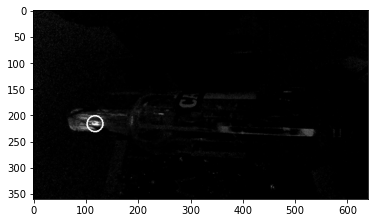

Pixel:  1
Frame:  343
Euclidean distance from last pixel:  20.0
Coordinates:  (134, 204)


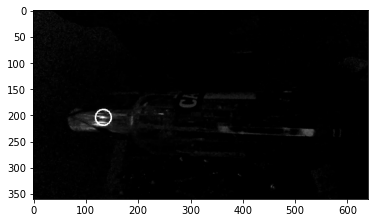

Pixel:  2
Frame:  349
Euclidean distance from last pixel:  5.0
Coordinates:  (139, 204)


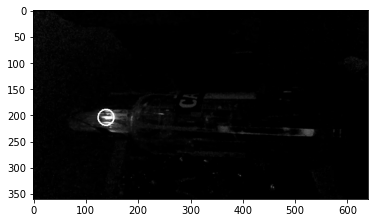

In [9]:
# Extract coordinates and save to a dictionary
# and plot each frame and its coordinates (useful to detect and fix mapping errors)

timed={}
n=firsFrame
i=0
while n < len(allframes) :
        diff_last_frame= distance(grayscalesave(n)[1], grayscalesave(max(firsFrame,(n-round(secBetweenPixels*framerate))))[1])
        timed[i]=[grayscalesave(n)[0],grayscalesave(n)[1],diff_last_frame]
        print("Pixel: ", i)
        print("Frame: ", n)
        print("Euclidean distance from last pixel: ", round(diff_last_frame, 2))
        print("Coordinates: ",grayscalesave(n)[1])
        grayscaleshow(n)
        n=n+round(secBetweenPixels*framerate)
        i=i+1

In [ ]:
# Extract the coordiantes into a list (for trimming and further 
# manipulations if needed) and then save/copy to a C array in the animation C code
coordinates=[]
for key, ele in timed.items():
    print(ele[1])
    coordinates.append(list(ele[1]))